In [1]:
%matplotlib notebook

<IPython.core.display.Javascript object>


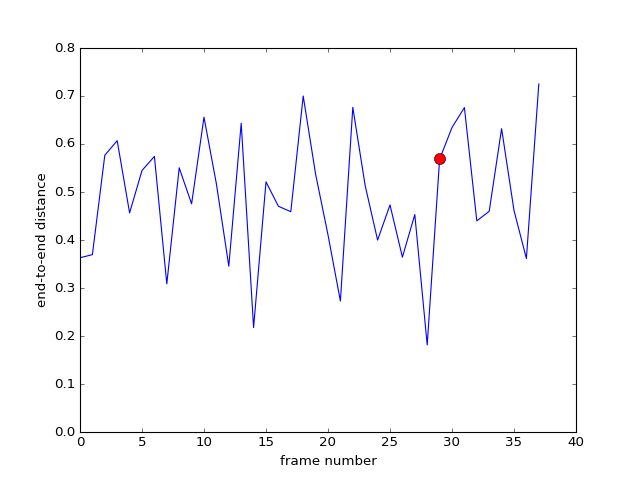

In [2]:
import matplotlib.pyplot as plt
from pytraj import view
import pytraj as pt

from nglview.link import link_mpl
import nglview as nv

from ipywidgets import VBox, IntText
from traitlets import link

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
traj = pt.fetch_pdb('1l2y')
end_to_end_distance = pt.distance(traj, ':1 :20')
data = {'label': 'end-to-end distance', 'value': end_to_end_distance}
ax.plot(data['value'])
ax.set_xlabel('frame number')
ax.set_ylabel(data['label'])

# convert pytraj's Trajectory to nglview.Trajectory

ntraj = pt.view.to_nglview(traj)

tv = nv.TrajectoryViewer(ntraj)
text = IntText(description='JumpTo')

link((text, 'value'), (tv, 'frame'))
tv.representations = []
tv._add_representation('not hydrogen', 'ball+stick')
tv._add_representation('all', 'cartoon')
link_mpl(tv, ax, data['value'])
VBox((tv, text))